# 課程設定
* 為什麼是 Python?
* 資料科學 ？
* 會有 numpy, jupyter notebook, pandas, scipy, sklearn, tensorflow, keras, opencv
* 實用取向，所以要從原理開始

In [1]:
# 起手式
import numpy as np

### 建立 ndarray

In [2]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [3]:
x = _

In [4]:
y = np.array([[1.,2,3],[4,5,6]])
y

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

看 ndarray 的第一件事情：  shape , dtype

In [5]:
x.shape

(4,)

In [6]:
y.shape

(2, 3)

In [7]:
x.dtype

dtype('int64')

In [8]:
y.dtype

dtype('float64')

### 有時候，可以看圖

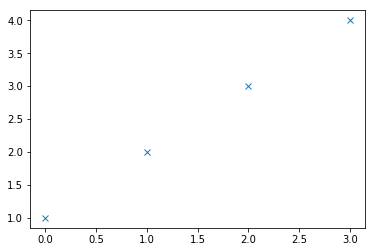

In [9]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# 畫圖
plt.plot(x, 'x');

### 有很多其他建立的方式

In [10]:
# 建立 0 array
np.zeros_like(y)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [11]:
np.zeros((10,10))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

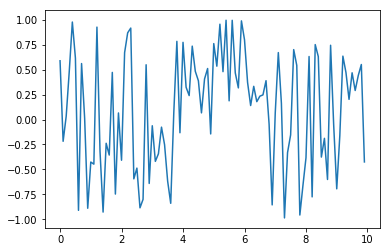

In [12]:
# 跟 range 差不多
x = np.arange(0, 10, 0.1)
# 亂數
y = np.random.uniform(-1,1, size=x.shape)
plt.plot(x, y)

這是一堆資料
* 資料有什麼資訊？
* 資料有什麼限制？
* 這些限制有什麼意義？好處？
* 以前碰過什麼類似的東西？
* 可以套用在哪些東西上面？
* 可以怎麼用（運算）?

最簡單的計算是 **逐項計算**


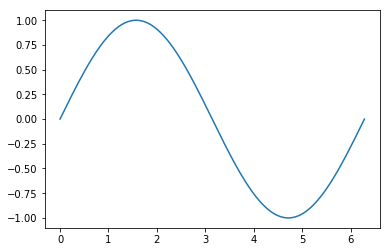

In [13]:
x = np.linspace(0, 2* np.pi, 1000)
plt.plot(x, np.sin(x))

## Q0:
畫出 $y=x^2+1$ 或其他函數的圖形
用
```python
plt.plot?
```
看看 plot 還有什麼參數可以玩

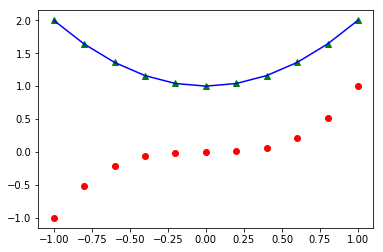

In [50]:
#可以用 %run -i 跑參考範例
%run -i q0.py

In [15]:
# 或者看看參考範例
#%load q0.py

## Q1:
試試看圖片。
使用
```python
from PIL import Image
# 讀入 PIL Image (這張圖是從 openclipart 來的 cc0)
img = Image.open('img/Green-Rolling-Hills-Landscape-800px.png')
# 圖片轉成 ndarray
img_array = np.array(img)
# ndarray 轉成 PIL Image
Image.fromarray(img_array)
```
看看這個圖片的內容, dtype 和 shape 

In [16]:
# 參考答案
#%load q1.py 

### Indexing
可以用類似 list 的 indexing

In [17]:
a = np.arange(30)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [18]:
a[5]

5

In [19]:
a[3:7]

array([3, 4, 5, 6])

In [20]:
# 列出所有奇數項
a[1::2]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [21]:
# 還可以用來設定值
a[1::2]  = -1
a

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16,
       -1, 18, -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1])

In [22]:
# 或是
a[1::2] = -a[::2]-1
a

array([  0,  -1,   2,  -3,   4,  -5,   6,  -7,   8,  -9,  10, -11,  12,
       -13,  14, -15,  16, -17,  18, -19,  20, -21,  22, -23,  24, -25,
        26, -27,  28, -29])

## Q2
給定
```python
x = np.arange(30)
a = np.arange(30)
a[1::2] = -a[1::2]
```
畫出下面的圖

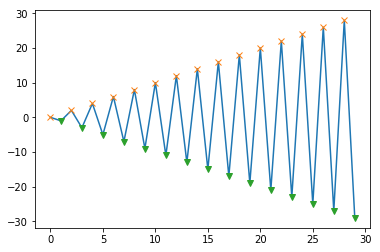

In [23]:
%run -i q2.py
#%load q2.py

### ndarray 也可以

In [25]:
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [26]:
b[1][2]

6

In [27]:
b[1,2]

6

In [28]:
b[1]

array([4, 5, 6])

## Q3
動手試試看各種情況
比方
```python
b = np.random.randint(0,99, size=(10,10))
b[::2, 2]
```

### Fancy indexing

In [36]:
b = np.random.randint(0,99, size=(5,10))
b

array([[44, 48, 43,  1, 80, 88, 20, 10, 67,  1],
       [85, 98, 54, 83, 93, 59, 81, 51,  8, 90],
       [58, 16, 21,  2, 54, 88, 10,  4, 20, 94],
       [30, 90, 20, 43, 57, 66, 12, 29,  3, 43],
       [44,  9, 31, 26, 96, 14, 76, 28, 52, 47]])

試試看下面的結果

想一下是怎麼一回事(numpy 在想什麼？)

In [37]:
b[[1,3]]

array([[85, 98, 54, 83, 93, 59, 81, 51,  8, 90],
       [30, 90, 20, 43, 57, 66, 12, 29,  3, 43]])

In [41]:
b[(1,3)]

83

In [43]:
b[[1,2], [3,4]]

array([83, 54])

In [46]:
b[[(1,2),(3,4)]]

array([83, 54])

In [40]:
b[[True, False, False, True, False]]

array([[44, 48, 43,  1, 80, 88, 20, 10, 67,  1],
       [30, 90, 20, 43, 57, 66, 12, 29,  3, 43]])

## Q4
把 `b` 中的偶數都變成 `-1`

In [66]:
#參考範例
%run -i q4.py

array([[-1, -1, 43,  1, -1, -1, -1, -1, 67,  1],
       [85, -1, -1, 83, 93, 59, 81, 51, -1, -1],
       [-1, -1, 21, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, 43, 57, -1, -1, 29,  3, 43],
       [-1,  9, 31, -1, -1, -1, -1, -1, -1, 47]])


# 用圖形來練習

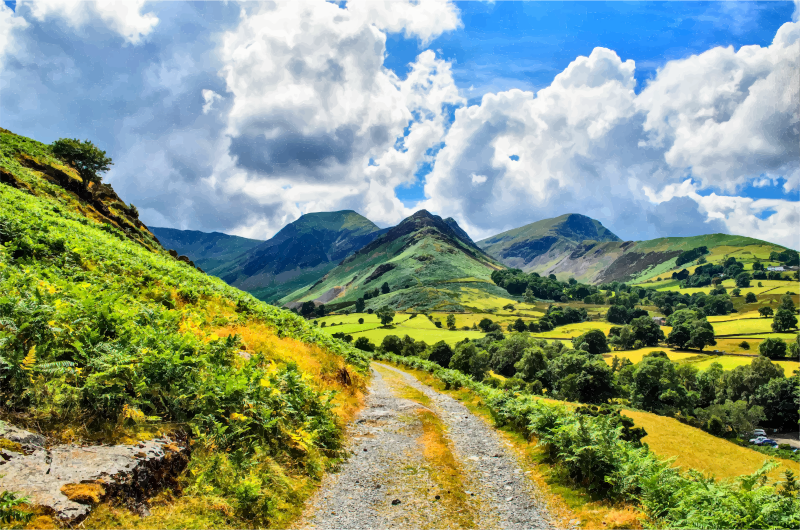

In [72]:
# 還記得剛才的
import PIL
img = Image.open('img/Green-Rolling-Hills-Landscape-800px.png')
img_array = np.array(img)
Image.fromarray(img_array)

In [78]:
# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

## Q 
* 將圖片縮小成一半
* 圖片上下顛倒
* 左右鏡射
* 去掉綠色
* 紅綠交換
* 團片變成黑白 參考 `Y=0.299R+0.587G+0.114B` 
  * 會碰到什麼困難？ 要如何解決

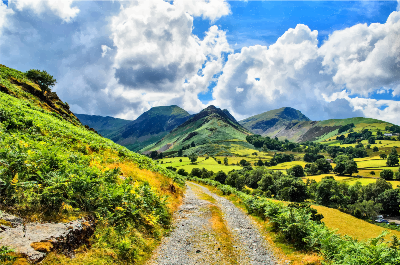

In [82]:
# 將圖片縮小成一半
%run -i q_half.py

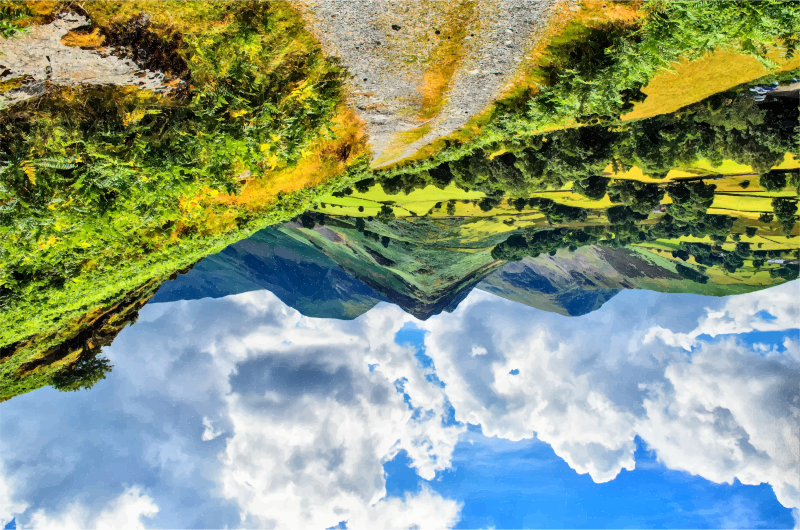

In [91]:
# 圖片上下顛倒
show(img_array[::-1])

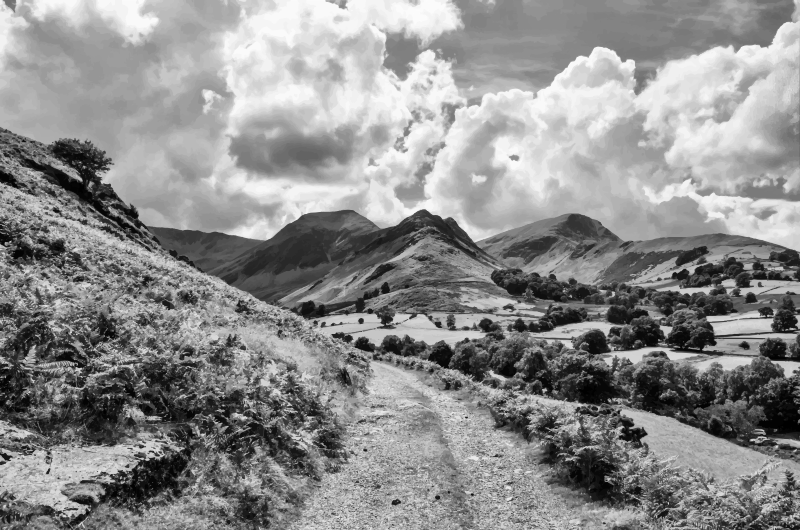

In [89]:
%run -i q_grayscale.py